In [24]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print(os.getcwd())

C:\Users\obias


In [25]:
# Define the correct file path
file_path = r"C:\Users\obias\Medical-Equipment-Suppliers.csv"

# Load the dataset
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59769 entries, 0 to 59768
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   provider_id             59769 non-null  int64  
 1   acceptsassignement      59769 non-null  bool   
 2   participationbegindate  59769 non-null  object 
 3   businessname            59769 non-null  object 
 4   practicename            59769 non-null  object 
 5   practiceaddress1        59769 non-null  object 
 6   practiceaddress2        12721 non-null  object 
 7   practicecity            59769 non-null  object 
 8   practicestate           59769 non-null  object 
 9   practicezip9code        59769 non-null  int64  
 10  telephonenumber         59769 non-null  int64  
 11  specialitieslist        59124 non-null  object 
 12  providertypelist        6790 non-null   object 
 13  supplieslist            59728 non-null  object 
 14  latitude                59769 non-null

In [45]:
df.head()

,provider_id,acceptsassignement,participationbegindate,businessname,practicename,practiceaddress1,practiceaddress2,practicecity,practicestate,practicezip9code,telephonenumber,specialitieslist,providertypelist,supplieslist,latitude,longitude,is_contracted_for_cba
0,20345603,False,2025-01-01,CVS PHARMACY INC,CVS PHARMACY #05255,3401 ALTA MERE DR,NaN,FORT WORTH,TX,761167111,8177635133,Pharmacy,NaN,Immunosuppressive Drugs|Infusion Drugs|Nebuliz...,32.72107,-97.44108,False
1,20345609,False,2025-01-01,CVS PHARMACY INC,CVS PHARMACY #04474,2781 DULLES AVE,NaN,MISSOURI CITY,TX,774592984,2814032320,Pharmacy,NaN,Immunosuppressive Drugs|Infusion Drugs|Nebuliz...,29.58393,-95.57997,False
2,20345615,False,2025-01-01,CVS PHARMACY INC,CVS PHARMACY #05388,3923 GARTH RD,NaN,BAYTOWN,TX,775213105,2814276156,Pharmacy,NaN,Immunosuppressive Drugs|Infusion Drugs|Nebuliz...,29.76570,-94.97757,False
3,20345621,False,2025-01-01,CVS PHARMACY INC,CVS PHARMACY 01108,3890 PHELAN BLVD,NaN,BEAUMONT,TX,777072247,4098328001,Pharmacy,NaN,Immunosuppressive Drugs|Infusion Drugs|Nebuliz...,30.08458,-94.14231,False
4,20345627,False,2025-01-01,CVS PHARMACY INC,CVS PHARMACY #04397,12550 LOUETTA RD,NaN,CYPRESS,TX,774292139,2812577792,Pharmacy,NaN,Immunosuppressive Drugs|Infusion Drugs|Nebuliz...,29.99650,-95.61316,False


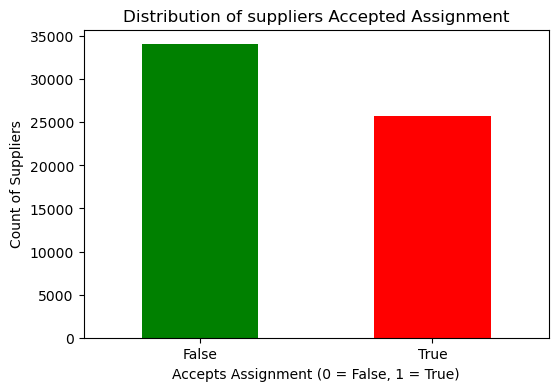

In [26]:
# descriptive visualization of the outcome variable
plt.figure(figsize=(6, 4))
df["acceptsassignement"].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel("Accepts Assignment (0 = False, 1 = True)")
plt.ylabel("Count of Suppliers")
plt.title("Distribution of suppliers Accepted Assignment")
plt.xticks(ticks=[0, 1], labels=["False", "True"], rotation=0)
plt.savefig("acceptsassignment.png", dpi=300, bbox_inches="tight")
plt.show()

In [27]:
# selecting independent variables
features = ["practicezip9code", "practicestate", "latitude", "longitude", "specialitieslist",  
"supplieslist"]

In [28]:
# Split the data into features and labels
X = df[features]
y = df["acceptsassignement"].astype(int)

In [29]:
X = X.dropna()
y = y[X.index] 

In [30]:
# using pd.get_dummies() to convert categorical variables
X = pd.get_dummies(X, columns=["practicestate", "specialitieslist", "supplieslist"], drop_first=True)

In [31]:
# standardizing variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num = ["practicezip9code", "latitude", "longitude"]
X[num] = scaler.fit_transform(X[num])

In [32]:
# create your train-test splits using 75/25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [33]:
#training the logistics reg model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, solver="liblinear") 
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [14]:
# test model
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

In [15]:
#calculating classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

In [16]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8496
Precision: 0.8631
Recall: 0.8745
ROC AUC Score: 0.9224

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      6367
           1       0.86      0.87      0.87      8405

    accuracy                           0.85     14772
   macro avg       0.85      0.85      0.85     14772
weighted avg       0.85      0.85      0.85     14772



In [17]:
# train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=13)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=13)

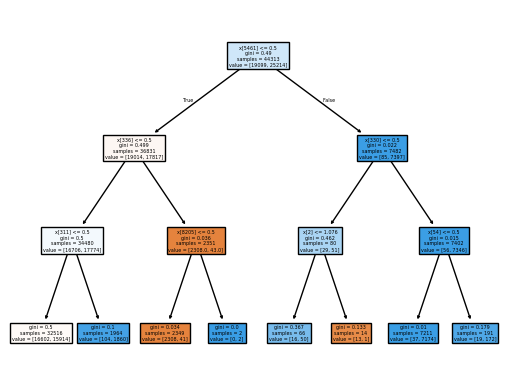

In [20]:
# plot the decision tree
from sklearn.tree import plot_tree
plot_tree(model, filled=True)
plt.savefig("tree.png", dpi=300, bbox_inches="tight")
plt.show()